# Competencia de Kaggle: Entreno un Arbol de Decision

Aqui entrenaremos un arbol de decision para predecir el precio de venta de los inmuebles. En este caso utilizaremos la libreria sklearn para crear un solo arbol de decision con una profundidad de 3. No haremos seleccion de parametros.

In [ ]:
# prompt: Leer el archivo train.csv con pandas
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Dividir los datos en Train y Test

In [ ]:
# prompt: Dividir df en dos dataframes df_train y df_test usando sklearn y dejando el 80% de los datos en df_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Transformar X_train

- Eliminar nulos y convertir categoricos a one hot encoding

In [ ]:
# prompt: Reemplazar los valores faltantes de las columnas numericas de df_train con la media
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  X_train[col].fillna(X_train[col].mean(), inplace=True)

In [ ]:
# prompt: Realizar get dummies con el parametro dummy_na = True
X_train = pd.get_dummies(X_train, dummy_na=True)

## Aplicar las mismas transformaciones a X_test

In [ ]:
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  X_test[col].fillna(X_train[col].mean(), inplace=True)
X_test = pd.get_dummies(X_test, dummy_na=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## Entrenar un modelo

In [ ]:
# prompt: create a sklearn regression tree and train it using df_train
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

## Verificar si ha sido bien entrenado

Calcular el error en las predicciones de Train y Test

In [ ]:
# prompt: Calculate the mean square error of model in the df_test dataframe

from sklearn.metrics import mean_squared_error

prediccion_train = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(np.log(y_train), np.log(prediccion_train)))
print(f"Train Mean root mean squared error: {rmse}")

prediccion_test = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(prediccion_test)))
print(f"Test Mean root mean squared error: {rmse}")


Train Mean root mean squared error: 0.2294831647047528
Test Mean root mean squared error: 0.2481311654079464


## Analizar el modelo

Cuando entrenamos modelos simples como KNN, Regresion Lineal o un Arbol de Decision es posible ver lo que esta pasando internamente y por que esta tomando cada decision.

En el caso de modelos mas complejos como ensembles, random forest, gradient boosting sera mas conveniente analizarlo a traves de metodos de caja negra como feature permutation y shap values.

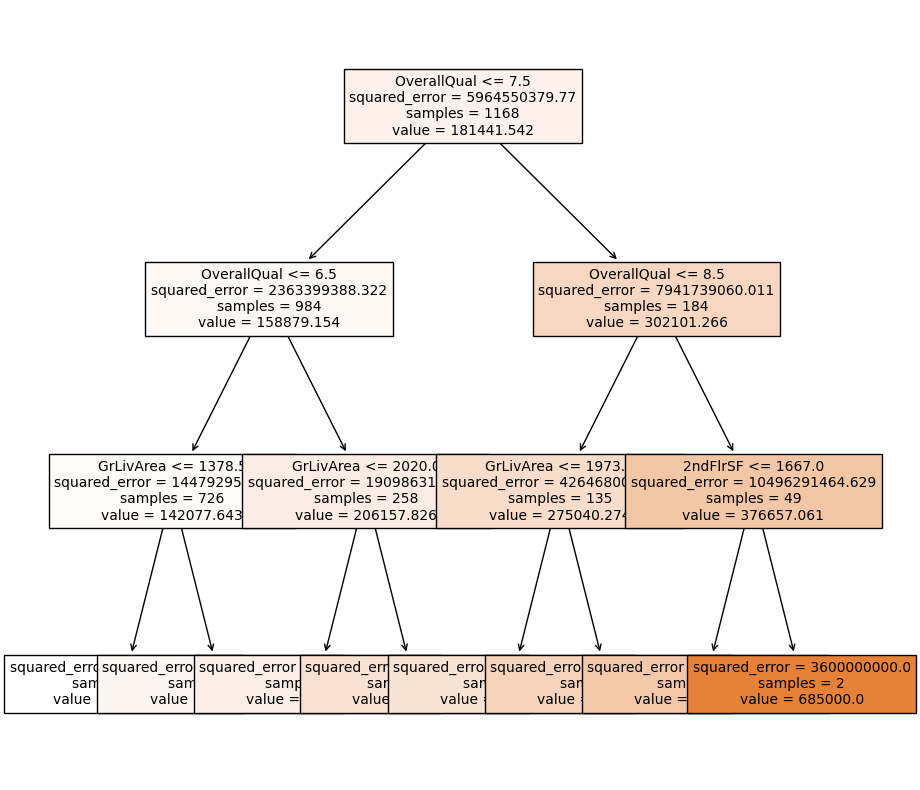

In [ ]:
# prompt: Plot the tree of model
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X_train.columns, fontsize=10, filled=True)
plt.show()


# Predecir nuevos valores

In [ ]:
# prompt: Leer el archivo test.csv con pandas
df_submission_test = pd.read_csv("test.csv")

In [ ]:
df_submission_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Aplicar las mismas transformaciones

In [ ]:
numerical_columns = df_submission_test.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
  df_submission_test[col].fillna(X_train[col].mean(), inplace=True)

In [ ]:
df_submission_test = pd.get_dummies(df_submission_test, dummy_na=True)

In [ ]:
df_submission_test = df_submission_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,...,False,True,False,False,False,False,False,True,False,False
1066,1067,60,59.0,7837,6,7,1993,1994,0.0,0,...,False,True,False,False,False,False,False,True,False,False
638,639,30,67.0,8777,5,7,1910,1950,0.0,0,...,False,True,False,False,False,False,False,True,False,False
799,800,50,60.0,7200,5,7,1937,1950,252.0,569,...,False,True,False,False,False,False,False,True,False,False
380,381,50,50.0,5000,5,6,1924,1950,0.0,218,...,False,True,False,False,False,False,False,True,False,False


## Predecir

In [ ]:
prediccion = model.predict(df_submission_test)

## Crear el archivo con las predicciones para enviar a la competencia

In [ ]:
# Create a new DataFrame
df_submission = pd.DataFrame({
    "Id": df_submission_test["Id"],
    "SalePrice": prediccion
})

df_submission.head()


,Id,SalePrice
0,1461,125810.157534
1,1462,125810.157534
2,1463,166817.777778
3,1464,166817.777778
4,1465,250999.813953


In [ ]:
# prompt: Generar un archivo .csv a partir del dataframe df_submission

df_submission.to_csv("submission.csv", index=False)
